In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#### let's analyze the seaborn's default dataset

In [2]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
data.shape

(244, 7)

In [3]:
data.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

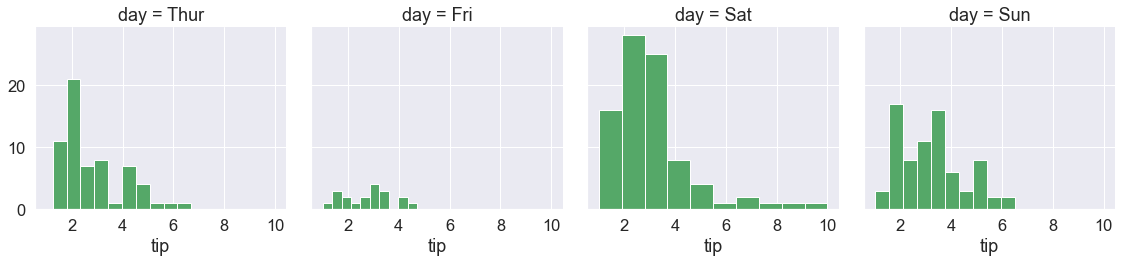

In [4]:
sns.set(font_scale = 1.5)
g = sns.FacetGrid(data, col = 'day', height = 4)
g.map(plt.hist, 'tip', color = 'g')

### Groupby, Stuck, Unstack and Agg methods

In [5]:
data.groupby(by = ['sex', 'smoker', 'time']).agg({'tip':'mean'})

tip
sex    smoker time            
Male   Yes    Lunch   2.790769
              Dinner  3.123191
       No     Lunch   2.941500
              Dinner  3.158052
Female Yes    Lunch   2.891000
              Dinner  2.949130
       No     Lunch   2.459600
              Dinner  3.044138

In [6]:
tips_gb = data.groupby(by = ['sex', 'time']).agg({'size': 'sum'})
tips_gb

size
sex    time        
Male   Lunch     78
       Dinner   335
Female Lunch     86
       Dinner   128

In [7]:
tips_unstack = tips_gb.unstack()
tips_unstack

size       
time   Lunch Dinner
sex                
Male      78    335
Female    86    128

## For loop with groupby method

In [21]:
for group,df in data.groupby(by = ['sex', 'time']):
    print(group)

('Male', 'Lunch')
('Male', 'Dinner')
('Female', 'Lunch')
('Female', 'Dinner')


In [22]:
for group,df in data.groupby(by = ['sex', 'time']):
    print(df.shape)
    print(type(df))

(33, 7)
<class 'pandas.core.frame.DataFrame'>
(124, 7)
<class 'pandas.core.frame.DataFrame'>
(35, 7)
<class 'pandas.core.frame.DataFrame'>
(52, 7)
<class 'pandas.core.frame.DataFrame'>


In [23]:
for group,df in data.groupby(by = ['sex', 'time']):
    print(group,df['size'].sum())

('Male', 'Lunch') 78
('Male', 'Dinner') 335
('Female', 'Lunch') 86
('Female', 'Dinner') 128
